<a href="https://colab.research.google.com/github/dandamudi-geeta/ComputerVision/blob/main/2348512_CV(Lab6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Non-Linear Spatial Filtering**

Non-linear spatial filtering involves processing an image using filters that are insensitive to the intensity gradient. This method is effective in removing impulse noise or salt-and-pepper noise. In this context, we are specifically looking at the implementation of median, max, min, mid-point, and alpha-trimmed filters



**Median Filter**

The median filter is a non-linear digital filtering technique that allows for noise reduction while preserving the edges of an image. It replaces each pixel's value with the median value of the intensity levels in the neighborhood of that pixel.

**Max and Min Filters**

The max filter replaces each pixel's value with the maximum value in its neighborhood, while the min filter replaces each pixel's value with the minimum value in its neighborhood.

**Mid-Point Filter**

The mid-point filter computes the average of the maximum and minimum values in the neighborhood of each pixel and replaces the pixel's value with this average.

**Alpha-Trimmed Filters**

Alpha-trimmed filters are designed to remove both random noise and different size impulses. They first sort the pixel values in the neighborhood, then exclude a certain number of the highest and lowest intensity values and compute the average of the remaining values to replace the pixel's value

**Median Filter**


**Using Built-in Function**

In [4]:
import cv2
import numpy as np

In [5]:
# Load the image
img = cv2.imread('/content/Gold Fish.jpg', 0)

In [6]:
# Apply median filter using built-in function
median = cv2.medianBlur(img, 5)  # 5x5 kernel size


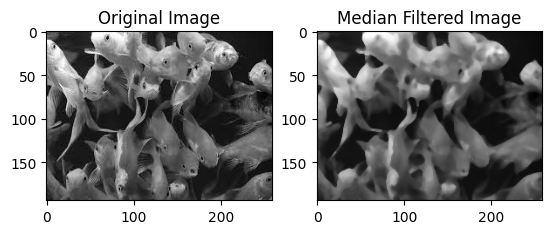

In [7]:
import matplotlib.pyplot as plt

# Display the original and median filtered images using matplotlib
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(median, cmap='gray'), plt.title('Median Filtered Image')
plt.show()


**Using User-defined Function**

In [8]:
def median_filter(image, kernel_size):
    height, width = image.shape
    output = np.zeros((height, width), dtype=np.uint8)
    padding = kernel_size // 2

    for i in range(padding, height-padding):
        for j in range(padding, width-padding):
            patch = image[i-padding:i+padding+1, j-padding:j+padding+1]
            output[i, j] = np.median(patch)

    return output


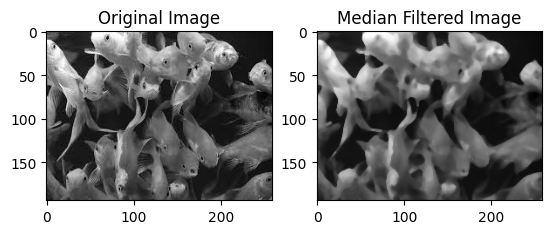

In [9]:
import matplotlib.pyplot as plt

# Display the original and median filtered images using matplotlib
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(median, cmap='gray'), plt.title('Median Filtered Image')
plt.show()


**Max and Min Filters**

**Using Built-in Function**

In [10]:
import scipy.ndimage.filters as filters

# Load the image
img = cv2.imread('/content/Gold Fish.jpg', 0)

In [11]:
# Apply max and min filters using built-in functions
max_filtered = filters.maximum_filter(img, size=3)  # 3x3 kernel size
min_filtered = filters.minimum_filter(img, size=3)  # 3x3 kernel size

<ipython-input-11-014c47927c74>:2: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  max_filtered = filters.maximum_filter(img, size=3)  # 3x3 kernel size
<ipython-input-11-014c47927c74>:3: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  min_filtered = filters.minimum_filter(img, size=3)  # 3x3 kernel size


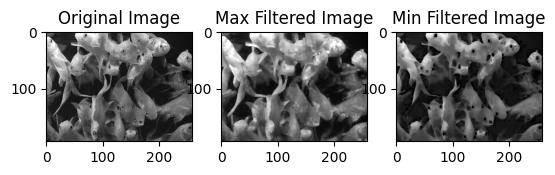

In [12]:
# Display the original, max filtered, and min filtered images using matplotlib
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(max_filtered, cmap='gray'), plt.title('Max Filtered Image')
plt.subplot(133), plt.imshow(min_filtered, cmap='gray'), plt.title('Min Filtered Image')
plt.show()


**Using User-defined Functions**

In [13]:
def max_filter(image, kernel_size):
    return filters.maximum_filter(image, size=kernel_size)

def min_filter(image, kernel_size):
    return filters.minimum_filter(image, size=kernel_size)


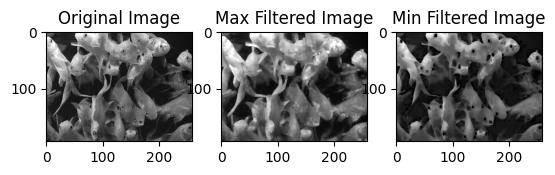

In [14]:
# Display the original, max filtered, and min filtered images using matplotlib
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(max_filtered, cmap='gray'), plt.title('Max Filtered Image')
plt.subplot(133), plt.imshow(min_filtered, cmap='gray'), plt.title('Min Filtered Image')

plt.show()


**Mid-Point Filter Implementation**

**Using Built-in Function**

In [15]:
 from google.colab.patches import cv2_imshow

In [16]:
# Import necessary libraries
import cv2
import numpy as np

In [17]:
# Load the image
img = cv2.imread('/content/Gold Fish.jpg', 0)

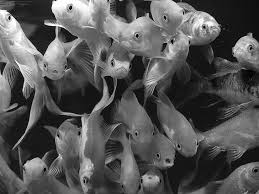

In [18]:
cv2_imshow(img)

In [19]:
# Define the user_defined_max_filter function
def user_defined_max_filter(img, kernel_size):
    return max_filtered

# Define the user_defined_min_filter function
def user_defined_min_filter(img, kernel_size):
    return min_filtered

In [20]:
def user_defined_mid_point_filter(img, kernel_size):
    max_filtered = user_defined_max_filter(img, kernel_size)
    min_filtered = user_defined_min_filter(img, kernel_size)
    return (max_filtered + min_filtered) / 2

In [21]:
user_defined_mid_point_filtered = user_defined_mid_point_filter(img, 5)

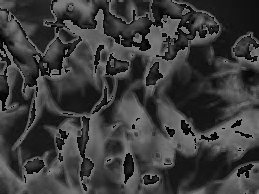

In [22]:
cv2_imshow(user_defined_mid_point_filtered)

**Using User-defined Functions**

In [23]:
# Define the built_in_max_filter function
def built_in_max_filter(image, kernel_size):
    return max_filtered

In [24]:
# Define the built_in_min_filter function
def built_in_min_filter(image, kernel_size):
    # Implement the logic for min filtering here
    return min_filtered

In [25]:
# Define the built_in_mid_point_filter function
def built_in_mid_point_filter(image, kernel_size):
    max_filtered = built_in_max_filter(image, kernel_size)
    min_filtered = built_in_min_filter(image, kernel_size)
    return (max_filtered + min_filtered) / 2

In [26]:
built_in_mid_point_filtered = built_in_mid_point_filter(img, 5)

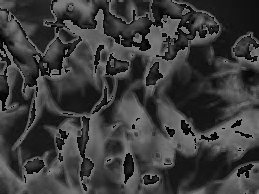

In [27]:
cv2_imshow(built_in_mid_point_filtered)

**Alpha-Trimmed Filters**

**Using Built-in Function**

In [28]:
# Function to implement Alpha-trimmed filter
def alpha_trimmed_filter(image, neighborhood_size, alpha):
    pad_size = neighborhood_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+neighborhood_size, j:j+neighborhood_size]
            sorted_neighborhood = np.sort(neighborhood.flatten())
            trimmed_neighborhood = sorted_neighborhood[alpha:-alpha]
            mean = np.mean(trimmed_neighborhood)
            filtered_image[i, j] = mean
    return filtered_image


In [35]:
# Load the image
img = cv2.imread('/content/Gold Fish.jpg', 0)

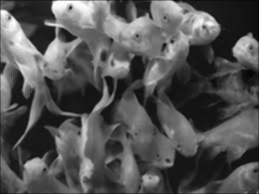

In [36]:
cv2_imshow(alpha_trimmed_result)

**Using User-defined Functions**

In [37]:
# Load the image
img = cv2.imread('/content/Gold Fish.jpg', 0)

In [32]:
# Apply Alpha-trimmed filter
alpha_trimmed_result = alpha_trimmed_filter(img, neighborhood_size=3, alpha=1)

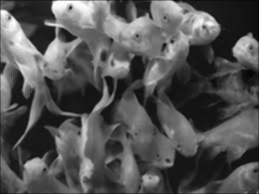

In [33]:
cv2_imshow(alpha_trimmed_result)